# eLabFTW API workshop - Part 2 - Using curl

This notebook will guide you towards using the `curl` command line tool to make requests. But first, we need a key!

## Chapter 1: Create your API Key

As an eLabFTW user, you already have an account and can navigate to your settings to generate an API key for authentication.

For this part, we will need to login via the web interface to manage the api keys.

Here is the link to your local instance:

[API Workshop Instance](https://api-workshop.elab.one)

#### 1. Log in and go to your `settings`
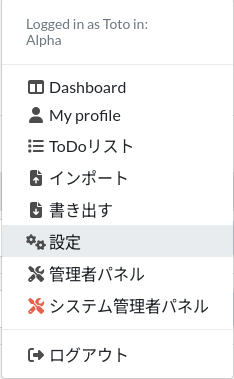

*(Click on the settings icon from the dropdown menu.)*

#### 2. Navigate to the `API KEYS` tab
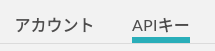

*(Find the API Key section where you can manage your keys.)*

#### 3. Create a read/write key
- Enter a name for the key (*e.g.* `api-for-test`).  
- Select the appropriate permission level. In this case, **read/write** would be appropriate for the course.
- Click **Generate API Key**.

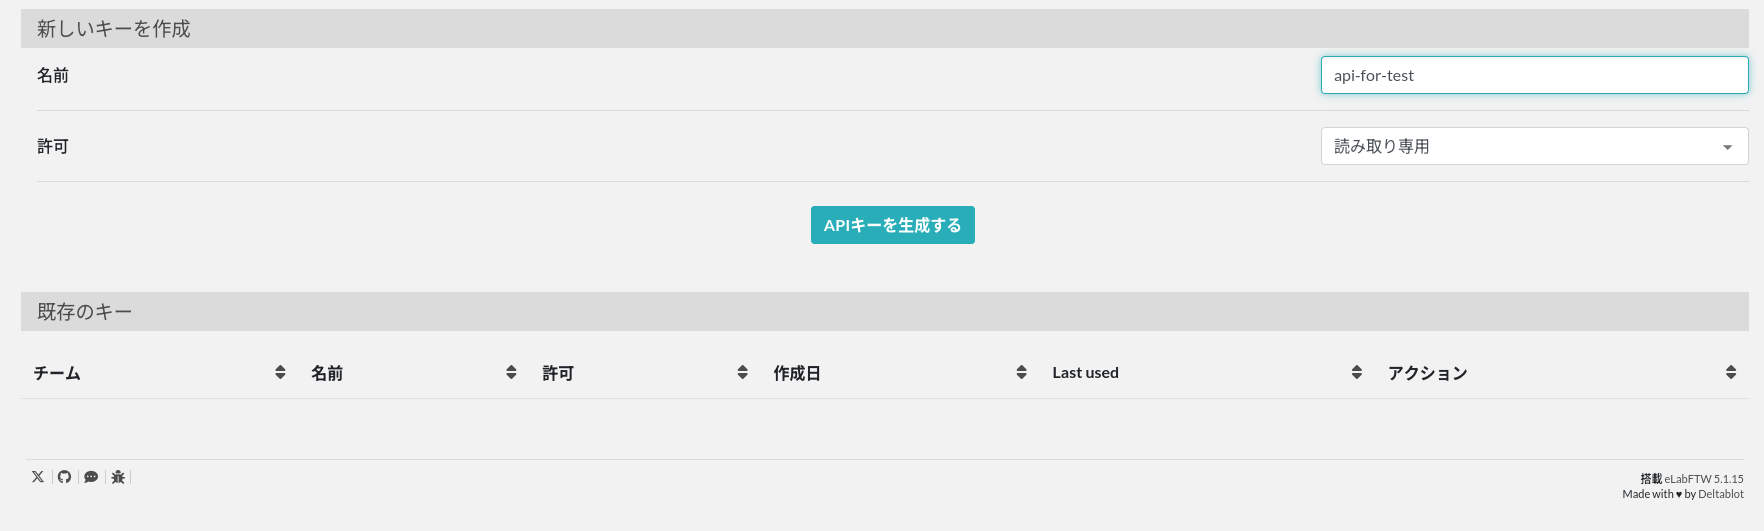 

Congratulations! The API Key has been generated. Make sure to save it somewhere safe. We will need it now to send requests to the API.

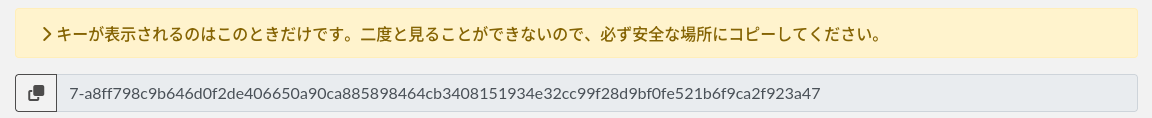


## Chapter 2: Make your first curl request with an API key

### Environment Setup & API Key Authentication

Before interacting with the API, the first step is to configure the necessary environment variables. These variables enable seamless communication with the API without requiring repeated manual input.

You will need to define the following:
- `API_URL`: The base URL of your eLabFTW instance.
- `API_KEY`:  The API key you recently generated.

In **Jupyter Lab**, you can use the `%env` magic command to set these environment variables, making them reusable by assigning them a key (name) instead of manually entering the full values each time.

#### Example: Setting Environment Variables

<div class="alert alert-block alert-info"><b>ⓘ Note:</b> Use your generated API Key and your API URL to adapt the code below.<br> <em>e.g.</em> %env API_URL=yourdomain.elab/api/v2/</div>

In [ ]:
%env API_URL=https://api-workshop.elab.one/api/v2/
%env API_KEY=1-d0336f788bd0c1984ff5f9e6a198e43c95367072bb149225aff9aeb5bf1283f1231f20e863b2c2399cc31

#### Verifying the Configuration

In [ ]:
! env | grep API

<div class="alert alert-block alert-success"><b>Success:</b> This will display all environment variables containing <b>"API_"</b>, ensuring they are correctly stored and accessible for further API interactions.</div>



### Now interact with the API!

Execute this command, and see below the explanation.

In [ ]:
! curl $API_URL -H "Authorization: $API_KEY"

**Explanation** :
- `curl`: A command-line tool for making HTTP requests.
- `-H "Authorization: $API_KEY"`: Adds an HTTP header for authentication, using your API key.

<div class="alert alert-block alert-warning"><b>💡 Important:</b> Always use double quotes (") around <b>"Authorization: ..."</b> to ensure the terminal correctly interprets the $API_KEY variable. Using single quotes (') would pass the string literally instead of expanding the variable.</div>

And the response you should get back from the server:

*Formatted JSON:*
```json
{
   "code":400,
   "message":"Bad Request",
   "description":"Invalid endpoint: available endpoints: apikeys, batch, config, idps, idps_sources, import, info, experiments, exports, items, experiments_templates, items_types, event, events, extra_fields_keys, favtags, team_tags, teams, todolist, unfinished_steps, users"
}
```

The error message indicates that the request was made to an invalid or non-existent endpoint. The API responded with a 400 Bad Request error, meaning the request is not correctly formatted or does not match an available resource.

The description provides a list of valid endpoints, such as apikeys, config, experiments, users, etc. This suggests that the issue is likely due to a typo in the endpoint name or an incorrect URL structure. To resolve this, on the next step we will use one of the listed endpoints in the request.

### **You may also receive:**

#### Authentication required

```json
{"code":401,"message":"Unauthorized","description":"Authentication required"}
```

**Explanation:**
This error occurs when the API key is incorrect or missing. The server rejects the request because authentication is required but not properly provided. Ensure that:

- Your API key is correctly set in the environment
- You are using double quotes around "Authorization: $API_KEY" in your curl request.

#### No corresponding API Key

<div class="alert alert-block alert-danger">No corresponding API key found!</div>

**Explanation:**
This message indicates that the provided API key exists and is correctly formatted, but it does not match any valid key on this eLabFTW instance. Possible reasons include:

- The API key was created in a different eLabFTW instance.
- The key has been revoked or deleted.
- The key was not copied correctly when set in the environment.

🔹 Solution: Double-check that you're using an active API key from the correct eLabFTW instance.

## Chapter 3: Try with existing endpoints

### Try with the `/info` endpoint.

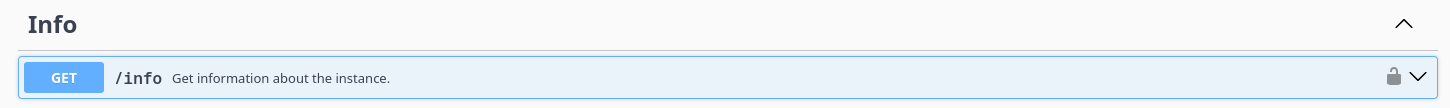

See [documentation](http://localhost:8085/#/Info/get-info) for this endpoint. We will execute the code below.

In [ ]:
! curl "$API_URL"/info -H "Authorization: $API_KEY"

*Formatted JSON:*
```json
{
   "elabftw_version":"5.2.0-alpha",
   "elabftw_version_int":50200,
   "ts_balance":0,
   "ts_limit":0,
   "uploads_filesize_sum":116507,
   "uploads_filesize_sum_formatted":"113.78 KiB",
   "all_users_count":2,
   "active_users_count":2,
   "items_count":0,
   "teams_count":2,
   "experiments_count":1,
   "experiments_timestamped_count":0,
   "entities_timestamped_count_last_30_days":0
}

### Now try with an non existent experiment: `/experiments`

In [ ]:
! curl "$API_URL"/experiments/13044 -H "Authorization: $API_KEY"

*Formatted JSON:*
```json
{
   "code":404,
   "message":"Resource Not Found",
   "description":"The resource was not found."
}
```

## Documentation

You will find on this page all endpoints documented (*e.g.* `apikeys`, `experiments`, `config` *etc.*), with their different verbs (*e.g.* `GET`, `PATCH`).

https://doc.elabftw.net/api/v2/

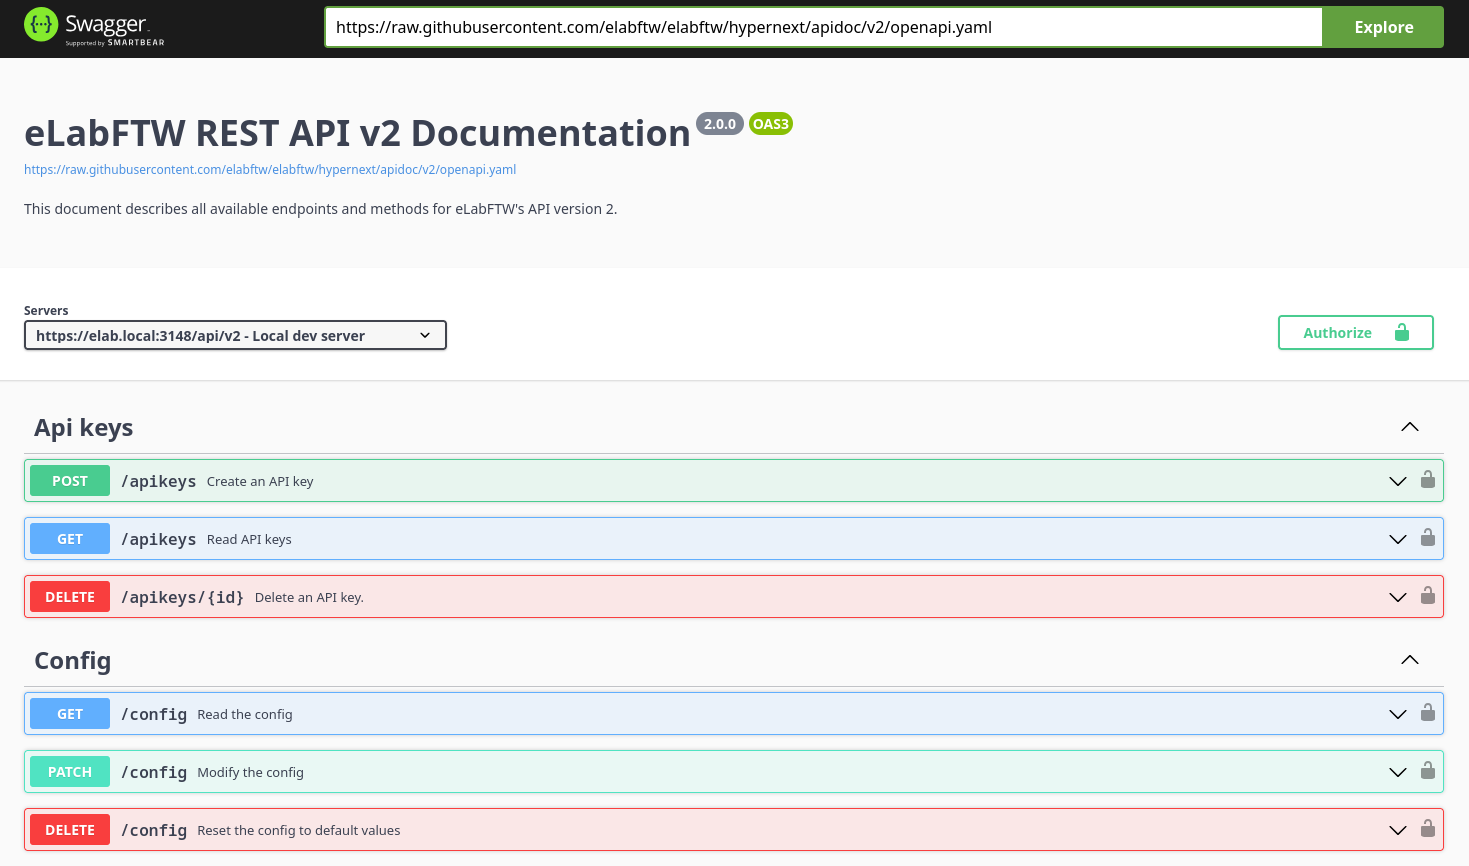

## Chapter 4: Perform a full CRUD with eLabFTW's API

Now that you have all the tools at your disposal, let us perform some actions from A to Z with the API. We are going to **C**reate, **R**ead, **U**pdate and **D**elete an experiment (**CRUD**).

### Post an experiment

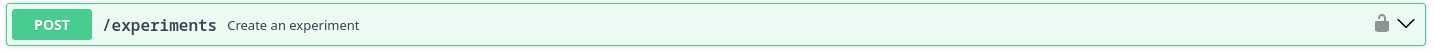

```bash
curl -X 'POST' \
  'https://elab.local:3148/api/v2/experiments' \
  -H 'accept: */*' \
  -H "Authorization: $K" \
  -H 'Content-Type: application/json' \
  -d '{
  "body": "<h1>Section title</h1><p>Main text of resource</p>",
  "canread": "{\"base\": 20, \"teams\": [], \"users\": [1], \"teamgroups\": [1]}",
  "canwrite": "{\"base\": 20, \"teams\": [], \"users\": [1], \"teamgroups\": [1]}",
  "category": 3,
  "content_type": 1,
  "metadata": {
    "extra_fields": {
      "Information": {
        "type": "text",
        "value": "Lorem ipsum.",
        "required": true,
        "description": "This is a field of type: text"
      }
    }
  },
  "rating": 0,
  "status": 1,
  "tags": [
    "test",
    "confidential",
    "replication"
  ],
  "title": "Test replicating the results of Naomi",
  "template": -1
}'
```

In [ ]:
!curl -X POST "$API_URL"/experiments -H "accept: */*" -H "Authorization: $API_KEY" -H "Content-Type: application/json" -d '{"body":"<h1>Section title</h1><p>Main text of resource</p>","canread":"{\"base\": 20, \"teams\": [], \"users\": [1], \"teamgroups\": [1]}","canwrite":"{\"base\": 20, \"teams\": [], \"users\": [1], \"teamgroups\": [1]}","category":3,"content_type":1,"metadata":{"extra_fields":{"Information":{"type":"text","value":"Lorem ipsum.","required":true,"description":"This is a field of type: text"}}},"rating":0,"status":1,"tags":["test","confidential","replication"],"title":"Test replicating the results of Naomi - using curl","template":-1}'
# this command has no output. As explained before, a post request with a "201 success - created" will not return any message.

<div class="alert alert-block alert-success"><b>Success:</b> 201 Created: The resource was successfully created, and no further content is returned.</div>



### Get an experiment

<div style="padding: 10px; border-left: 5px solid #2b7de9; background-color: #eef6ff;">
    <strong>ⓘ Note:</strong> Here, we will extract the "id" and "title" from the JSON response.
</div>

To retrieve both **ID** and **Title** from the experiments API, use this command:

In [ ]:
!curl -s -X GET "$API_URL"/experiments -H 'accept: application/json' -H "Authorization: $API_KEY" | jq '.[] | {id, title}'

#### Here is a breakdown of this command

This command retrieves a list of experiments from the eLabFTW API and extracts only the `id` and `title` fields from the response.

- The `curl` command sends a `GET` request to the API at `https://demo.elabftw.net/api/v2/experiments`.
- The `-s` option makes the request silent, meaning it won’t show progress or error messages unless necessary.
- The `-H 'accept: application/json'` header ensures that the server returns the response in JSON format
- and the `-H "Authorization: $K"` header provides the required authentication using the API key stored in the `$K` environment variable.

The output of the `curl` command is piped (`|`) to `jq`, which is a tool for processing JSON data. The filter `.[] | {id, title}` tells `jq` to process each item in the returned JSON list and extract only the `id` and `title` fields from each experiment. The result is a list of objects containing just these two fields, making it easier to read and work with the relevant information without extra details from the full API response.

```json
{
  "id": 1,
  "title": "Test replicating the results of Naomi - using curl"
}
```

If you need not to filter the result for the id and title, you can of course remove the part with `| jq '....'`

We can now use the latest id, which is the experiment we created

### Get one specific experiment

The command below will retrieve one experiment and its information.

In [ ]:
!curl -s -X GET "$API_URL"/experiments/1 -H 'accept: application/json' -H "Authorization: $API_KEY" | jq '.'

### Patch an experiment

This command patches the experiment with the ID you provide.

In [ ]:
!curl -s -X PATCH "$API_URL"/experiments/4 -H 'accept: application/json' -H "Authorization: $API_KEY" -H 'Content-Type: application/json' -d '{"title": "Updated the title through curl"}' | jq '.'

<div class="alert alert-block alert-success"><b>Success:</b> 200 Success: The resource is returned with updated content.</div>



### Delete an experiment

Deleting an experiment is a simple task. You need to provide the ID as the parameter, and the response will be empty on success, just like the POST verb.

But, if you try to do it twice for example, 

In [ ]:
!curl -s -X 'DELETE' "$API_URL"/experiments/2 \
  -H 'accept: application/json' \
  -H 'Content-Type: application/json' \
  -H "Authorization: $API_KEY" | jq '.'

<div class="alert alert-block alert-success"><b>Success:</b> 204 No Content: The resource was successfully deleted, and no further content is returned.</div>

